In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("milestone3").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/06/27 02:31:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
df_navhistory = spark.read.option("header", True).option("inferschema", True).csv("/Users/syedaman/Desktop/Data/NavHistory.csv")

In [1]:
import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession



# Create Spark Configuration
my_conf = SparkConf()
my_conf.set("spark.app.name", "Problem_1")
my_conf.set("spark.master", "local[*]")



# Create Spark Session
spark = SparkSession.builder.config(conf=my_conf).getOrCreate()
NavHistory = spark.read\
.format("csv")\
.option("header", True)\
.option("path", "/Users/syedaman/Desktop/Data/NavHistory.csv")\
.load()
NavHistory.createOrReplaceTempView("NavHistory")
Mutual_funds = spark.read\
.format("csv")\
.option("header", True)\
.option("path", "/Users/syedaman/Desktop/Data/MutualFund.csv")\
.load()
Mutual_funds.createOrReplaceTempView("Mutual_funds")
df_result = spark.sql("""with code_data as (select code,date_format(nav_date, 'yyyy-MM') \
as Month_yr,min(nav_date) as start_date,max(nav_date) as end_date from NavHistory group by 1,2) \
select code_data.code, mfd.name as Name, code_data.Month_yr, code_data.start_date, \
code_data.end_date, b.nav, round((c.nav-b.nav)*100/b.nav,4) as MTD_perform from code_data \
join NavHistory b on code_data.start_date=b.nav_date and code_data.code = b.code join \
NavHistory c on code_data.end_date=c.nav_date and code_data.code = c.code join Mutual_funds \
mfd on mfd.code = code_data.code order by code_data.code, code_data.Month_yr""").show(100)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/06/27 09:35:24 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


CodeCache: size=131072Kb used=21245Kb max_used=21245Kb free=109827Kb
 bounds [0x000000010489c000, 0x0000000105dac000, 0x000000010c89c000]
 total_blobs=8992 nmethods=8062 adapters=843
 compilation: disabled (not enough contiguous free space left)


OpenJDK 64-Bit Server VM warning: CodeCache is full. Compiler has been disabled.
OpenJDK 64-Bit Server VM warning: Try increasing the code cache size using -XX:ReservedCodeCacheSize=


+------+--------------------+--------+----------+----------+-------+-----------+
|  code|                Name|Month_yr|start_date|  end_date|    nav|MTD_perform|
+------+--------------------+--------+----------+----------+-------+-----------+
|100033|Aditya Birla Sun ...| 2018-12|2018-12-03|2018-12-31|3871600|      0.359|
|100033|Aditya Birla Sun ...| 2019-01|2019-01-01|2019-01-31|3902400|    -3.4799|
|100033|Aditya Birla Sun ...| 2019-02|2019-02-01|2019-02-28|3783200|    -0.8062|
|100033|Aditya Birla Sun ...| 2019-03|2019-03-01|2019-03-29|3778800|     6.9863|
|100033|Aditya Birla Sun ...| 2019-04|2019-04-01|2019-04-30|4057800|     -0.276|
|100033|Aditya Birla Sun ...| 2019-05|2019-05-02|2019-05-31|4029200|     3.0974|
|100033|Aditya Birla Sun ...| 2019-06|2019-06-03|2019-06-28|4200600|    -2.0664|
|100033|Aditya Birla Sun ...| 2019-07|2019-07-01|2019-07-31|4130200|    -9.1158|
|100033|Aditya Birla Sun ...| 2019-08|2019-08-01|2019-08-30|3728300|     0.0831|
|100033|Aditya Birla Sun ...

In [14]:
df_navhistory.show()

+------+-------------------+------+----------------+----------+
|  code|           nav_date|   nav|repurchase_price|sale_price|
+------+-------------------+------+----------------+----------+
|120373|2018-12-03 00:00:00|688138|               0|         0|
|120373|2018-12-04 00:00:00|686524|               0|         0|
|120373|2018-12-05 00:00:00|681853|               0|         0|
|120373|2018-12-06 00:00:00|674551|               0|         0|
|120373|2018-12-07 00:00:00|680586|               0|         0|
|120373|2018-12-10 00:00:00|669715|               0|         0|
|120373|2018-12-11 00:00:00|672952|               0|         0|
|120373|2018-12-12 00:00:00|685970|               0|         0|
|120373|2018-12-13 00:00:00|690027|               0|         0|
|120373|2018-12-14 00:00:00|691042|               0|         0|
|120373|2018-12-17 00:00:00|695260|               0|         0|
|120373|2018-12-18 00:00:00|699280|               0|         0|
|120373|2018-12-19 00:00:00|706902|     

In [3]:
df_navhistory.createOrReplaceTempView("nav_data")

In [4]:
df_navdata= spark.sql("select * from nav_data order by nav_date desc").show()

+------+-------------------+--------+----------------+----------+
|  code|           nav_date|     nav|repurchase_price|sale_price|
+------+-------------------+--------+----------------+----------+
|147126|2021-01-31 00:00:00|10002579|               0|         0|
|146675|2021-01-31 00:00:00|10825308|               0|         0|
|145485|2021-01-31 00:00:00|10001869|               0|         0|
|146678|2021-01-31 00:00:00|10813217|               0|         0|
|146680|2021-01-31 00:00:00|10011818|               0|         0|
|147952|2021-01-31 00:00:00|10000000|               0|         0|
|147125|2021-01-31 00:00:00|10779124|               0|         0|
|146676|2021-01-31 00:00:00|10012187|               0|         0|
|145489|2021-01-31 00:00:00|10001900|               0|         0|
|146681|2021-01-31 00:00:00|10013451|               0|         0|
|145481|2021-01-31 00:00:00|11042880|               0|         0|
|147197|2021-01-31 00:00:00|10000000|               0|         0|
|147198|20

In [15]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

In [16]:
from handyspark import *

In [5]:
df_mutual = spark.read.option("header", True).option("inferschema", True).csv("/Users/syedaman/Desktop/Data/MutualFund.csv")

In [6]:
df_mutual.show()

+------+------+-----------+--------------------+------------+--------------------+--------------------------+
|  code|amc_id|category_id|                name| isin_growth|isin_dividend_payout|isin_dividend_reinvestment|
+------+------+-----------+--------------------+------------+--------------------+--------------------------+
|120373|     1|          1|SAHARA BANKING & ...|INF515L01AJ6|        INF515L01AJ6|                      null|
|109493|     1|          1|SAHARA BANKING & ...|INF515L01494|        INF515L01494|                      null|
|120374|     1|          1|SAHARA BANKING & ...|INF515L01AH0|        INF515L01AH0|              INF515L01AI8|
|109494|     1|          1|SAHARA BANKING & ...|INF515L01478|        INF515L01478|              INF515L01486|
|101529|     1|          1|Sahara Growth Fun...|INF515L01155|        INF515L01155|              INF515L01163|
|120288|     1|          1|Sahara Growth Fun...|INF515L01759|        INF515L01759|              INF515L01767|
|101528|  

In [94]:


df_per = df_navhistory.join(df_mutual,df_navhistory.code == df_mutual.code,"inner")

df_per.createOrReplaceTempView("perf_data")




In [44]:
row1 = df_per.agg({"nav_date": "max"}).collect()[0]

print(row1)


Row(max(nav_date)=datetime.datetime(2021, 1, 31, 0, 0))


In [45]:
row2 = df_per.agg({"nav_date": "min"}).collect()[0]

print(row2)


Row(min(nav_date)=datetime.datetime(2018, 12, 1, 0, 0))


In [78]:
df_mp = spark.sql("select max(nav_date) as max_day_year,min(nav_date) as min_day_year,name from perf_data where year(nav_date) = 2019 group by name  ").show()

#df_mp.createOrReplaceTempView("mp_data")

+-------------------+-------------------+--------------------+
|       max_day_year|       min_day_year|                name|
+-------------------+-------------------+--------------------+
|2019-12-31 00:00:00|2019-01-01 00:00:00|Sahara Growth Fun...|
|2019-12-31 00:00:00|2019-01-01 00:00:00|Edelweiss Large &...|
|2019-12-31 00:00:00|2019-01-01 00:00:00|Invesco India Gro...|
|2019-12-31 00:00:00|2019-01-01 00:00:00|Principal Focused...|
|2019-12-31 00:00:00|2019-01-01 00:00:00|Sundaram Select F...|
|2019-12-31 00:00:00|2019-01-02 00:00:00|ICICI Prudential ...|
|2019-12-31 00:00:00|2019-01-01 00:00:00|UTI India Consume...|
|2019-12-31 00:00:00|2019-01-01 00:00:00|Aditya Birla Sun ...|
|2019-12-31 00:00:00|2019-01-01 00:00:00|BOI AXA Liquid Fu...|
|2019-12-31 00:00:00|2019-01-01 00:00:00|Invesco India Liq...|
|2019-12-31 00:00:00|2019-01-01 00:00:00|Mirae Asset Cash ...|
|2019-12-31 00:00:00|2019-01-17 00:00:00|YES Liquid Fund- ...|
|2019-12-31 00:00:00|2019-01-01 00:00:00|Axis Ultra Sho

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_nav = pd.read_csv("/Users/syedaman/Desktop/Data/NavHistory.csv",header='infer')

In [6]:
df_nav.head()

,code,nav_date,nav,repurchase_price,sale_price
0,120373,2018-12-03,688138.0,0,0
1,120373,2018-12-04,686524.0,0,0
2,120373,2018-12-05,681853.0,0,0
3,120373,2018-12-06,674551.0,0,0
4,120373,2018-12-07,680586.0,0,0


In [9]:
df_funds = pd.read_csv("/Users/syedaman/Desktop/Data/AMC.csv",header='infer')

In [10]:
df_funds.head()

,id,name
0,1,Sahara Mutual Fund
1,2,Taurus Mutual Fund
2,3,Baroda Mutual Fund
3,4,BNP Paribas Mutual Fund
4,5,Essel Mutual Fund


In [12]:
df_mutual = pd.read_csv("/Users/syedaman/Desktop/Data/MutualFund.csv",header='infer')

In [14]:
df_mutual.head()

,code,amc_id,category_id,name,isin_growth,isin_dividend_payout,isin_dividend_reinvestment
0,120373,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND- GROW...,INF515L01AJ6,INF515L01AJ6,NaN
1,109493,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND- GROW...,INF515L01494,INF515L01494,NaN
2,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8
3,109494,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01478,INF515L01478,INF515L01486
4,101529,1,1,Sahara Growth Fund-Dividend,INF515L01155,INF515L01155,INF515L01163


In [41]:
df_join = pd.merge(df_funds, df_mutual, left_on='id', right_on='amc_id')


In [42]:
df_join_final = pd.merge(df_join, df_nav, left_on='code', right_on='code').dropna()

In [43]:
df_join_final.head()

,id,name_x,code,amc_id,category_id,name_y,isin_growth,isin_dividend_payout,isin_dividend_reinvestment,nav_date,nav,repurchase_price,sale_price
648,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2018-12-03,233463.0,0,0
649,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2018-12-04,232913.0,0,0
650,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2018-12-05,231326.0,0,0
651,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2018-12-06,228846.0,0,0
652,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2018-12-07,230890.0,0,0


In [75]:
import datetime
df_join_final['yyyy'] = pd.to_datetime(df_join_final["nav_date"]).dt.year
df_join_final['mm'] = pd.to_datetime(df_join_final["nav_date"]).dt.month_name()

df_join_final.groupby(['nav_date', 'name_x']).head()

,id,name_x,code,amc_id,category_id,name_y,isin_growth,isin_dividend_payout,isin_dividend_reinvestment,nav_date,nav,repurchase_price,sale_price,yyyy,mm
648,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2018-12-03,233463.0,0,0,2018,December
649,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2018-12-04,232913.0,0,0,2018,December
650,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2018-12-05,231326.0,0,0,2018,December
651,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2018-12-06,228846.0,0,0,2018,December
652,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2018-12-07,230890.0,0,0,2018,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5436834,43,ITI Mutual Fund,147156,43,17,ITI Liquid Fund - Regular Plan - Monthly Divid...,INF00XX01267,INF00XX01267,INF00XX01234,2021-01-26,10010003.0,0,0,2021,January
5436838,43,ITI Mutual Fund,147156,43,17,ITI Liquid Fund - Regular Plan - Monthly Divid...,INF00XX01267,INF00XX01267,INF00XX01234,2021-01-30,10013265.0,0,0,2021,January
5436839,43,ITI Mutual Fund,147156,43,17,ITI Liquid Fund - Regular Plan - Monthly Divid...,INF00XX01267,INF00XX01267,INF00XX01234,2021-01-31,10014090.0,0,0,2021,January
5439519,43,ITI Mutual Fund,147710,43,16,ITI Overnight Fund - Direct Plan - Fortnightly...,INF00XX01622,INF00XX01622,INF00XX01598,2019-12-14,10013865.0,0,0,2019,December


In [124]:
df_filter= df_join_final[(df_join_final.yyyy == 2019) & ((df_join_final.mm == 'January') | (df_join_final.mm == 'February') | (df_join_final.mm == 'March')) ]

In [125]:
df_filter[(df_filter.name_x == 'Sahara Mutual Fund') | (df_filter.name_x== 'Baroda Mutual Fund') | (df_filter.name_x == 'ITI Mutual Fund')]

,id,name_x,code,amc_id,category_id,name_y,isin_growth,isin_dividend_payout,isin_dividend_reinvestment,nav_date,nav,repurchase_price,sale_price,yyyy,mm
668,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-01-01,239974.0,0,0,2019,January
669,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-01-02,238457.0,0,0,2019,January
670,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-01-03,236575.0,0,0,2019,January
671,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-01-04,238856.0,0,0,2019,January
672,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-01-07,239443.0,0,0,2019,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96466,3,Baroda Mutual Fund,145389,3,35,Baroda Dynamic Equity Fund-Regular Plan-Divide...,INF955L01HD2,INF955L01HD2,INF955L01HE0,2019-03-25,103800.0,0,0,2019,March
96467,3,Baroda Mutual Fund,145389,3,35,Baroda Dynamic Equity Fund-Regular Plan-Divide...,INF955L01HD2,INF955L01HD2,INF955L01HE0,2019-03-26,104400.0,0,0,2019,March
96468,3,Baroda Mutual Fund,145389,3,35,Baroda Dynamic Equity Fund-Regular Plan-Divide...,INF955L01HD2,INF955L01HD2,INF955L01HE0,2019-03-27,104600.0,0,0,2019,March
96469,3,Baroda Mutual Fund,145389,3,35,Baroda Dynamic Equity Fund-Regular Plan-Divide...,INF955L01HD2,INF955L01HD2,INF955L01HE0,2019-03-28,105200.0,0,0,2019,March


In [130]:
df_final = df_filter.groupby(['mm'])['nav'].sum()
df_final.head()

mm
February    1.008047e+11
January     1.159641e+11
March       1.051281e+11
Name: nav, dtype: float64

In [129]:
#df_new = df_final[['name_x','nav','mm']]
df_final = df_final.groupby('mm')['nav'].sum()


KeyError: 'mm'

In [116]:
#df_new.groupby(['name_x', 'nav']).sum()

#from grouping_and_sorting import *

#news_count_res = df_new[['name_x','nav','mm']]
df_new.groupby(['name_x'])




AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

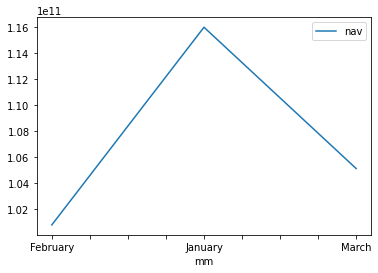

In [132]:
import matplotlib.pyplot as plt


#lines = df_final.plot.line()
df_final.plot(x = 'mm', y = 'nav')


# Plot a simple line chart
#plt.plot(df_final['nav'], df_final['mm'], color='g', label='Line y')

# Plot another line on the same chart/graph
#plt.plot(df_join_final['x'], df_join_final['z'], color='r', label='Line z')

plt.legend()
plt.show()


In [136]:
# Milestone-3 problem-3
# using pyspark


from pyspark.sql import SparkSession 

spark = SparkSession \
        .builder \
        .appName("milestone3") \
        .getOrCreate()

df_mutualfunds = spark.read.option("header", True).option("inferschema", True).csv("/Users/epareek/Desktop/Data 3/MutualFund.csv")

df_navh = spark.read.option("header", True).option("inferschema", True).csv("/Users/epareek/Desktop/Data 3/NavHistory.csv")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/06/23 15:35:34 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/06/23 15:35:35 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [137]:
df_mutualfunds.createOrReplaceTempView("mutual_data")
df_navh.createOrReplaceTempView("nav_data")

In [157]:
df_result= spark.sql("select m.name,n.nav from mutual_data as m join nav_data as n on m.code=n.code \
                          where n.nav=0")


df_result.createOrReplaceTempView("result_data")
df_sonu = spark.sql("select name from result_data group by name").show()


+--------------------+
|                name|
+--------------------+
|Tata Fixed Maturi...|
|Tata Fixed Maturi...|
|Tata Fixed Maturi...|
|Tata Fixed Maturi...|
|Tata Fixed Maturi...|
|Tata Fixed Maturi...|
|Tata Fixed Maturi...|
|Tata Fixed Maturi...|
|Tata Infrastructu...|
|Tata Infrastructu...|
|Nippon India Equi...|
|UTI - Credit Risk...|
|Franklin India Lo...|
|Baroda Credit Ris...|
|Franklin India Sh...|
|UTI - Credit Risk...|
|Baroda Treasury A...|
|Nippon India Equi...|
|Franklin India Sh...|
|Franklin India Sh...|
+--------------------+
only showing top 20 rows



In [161]:
#milestone-3 problem-5 *****

df_result= spark.sql("select m.name,max(n.nav),min(n.nav) from mutual_data as m join nav_data as n on m.code=n.code\
                          where year(n.nav_date) = 2019 group by m.name").show()





+--------------------+--------+--------+
|                name|max(nav)|min(nav)|
+--------------------+--------+--------+
|Sahara Growth Fun...|  468675|  392938|
|Edelweiss Large &...|  332130|  286050|
|Invesco India Gro...|  402900|  342100|
|Principal Focused...|  282400|  235400|
|Sundaram Select F...| 2043190| 1699273|
|ICICI Prudential ...|  322100|  236000|
|UTI India Consume...|  285406|  243298|
|Aditya Birla Sun ...| 1080726| 1080230|
|BOI AXA Liquid Fu...|10634167|10615518|
|Invesco India Liq...|10094409|10029500|
|Mirae Asset Cash ...|10762542|10758332|
|YES Liquid Fund- ...|10009971|10003609|
|Axis Ultra Short ...|  100715|  100496|
|Essel Ultra Short...|10072615|10038575|
|UTI MMF- Disconti...|20048631|19865431|
|Invesco India Sho...|10250941|10171614|
|DSP Strategic Bon...|10837045|10170316|
|JM Dynamic Debt F...|  311711|  292205|
|Axis Corporate De...|  101624|   96877|
|Edelweiss Corpora...|  146970|  126865|
+--------------------+--------+--------+
only showing top